In [1]:
work<-read.csv(file.choose())

In [2]:
summary(work)

     sn_res         weight_1        Gender             weight_2    
 Min.   : 1.00   Min.   :48.00   Length:30          Min.   :45.00  
 1st Qu.: 8.25   1st Qu.:52.00   Class :character   1st Qu.:52.00  
 Median :15.50   Median :55.00   Mode  :character   Median :54.00  
 Mean   :15.50   Mean   :54.67                      Mean   :53.57  
 3rd Qu.:22.75   3rd Qu.:57.00                      3rd Qu.:55.00  
 Max.   :30.00   Max.   :62.00                      Max.   :59.00  

In [3]:
head(work)

,sn_res,weight_1,Gender,weight_2
,<int>,<int>,<chr>,<int>
1,1,55,F,55
2,2,54,F,54
3,3,58,F,55
4,4,53,F,53
5,5,48,F,50
6,6,50,F,47


structure of work object

In [4]:
str(work)

'data.frame':	30 obs. of  4 variables:
 $ sn_res  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ weight_1: int  55 54 58 53 48 50 54 53 52 55 ...
 $ Gender  : chr  "F" "F" "F" "F" ...
 $ weight_2: int  55 54 55 53 50 47 54 53 51 52 ...


set sex variable as factor 

In [5]:
work$Gender<-as.factor(work$Gender)

In [6]:
## to list attributes of sex
attributes(work$Gender)

$levels
[1] "F" "M"

$class
[1] "factor"

In [7]:
mean(work$weight_1)

[1] 54.66667

## one sample t test

In [8]:
t.test(work$weight_1, mu=50) # mu is true mean


	One Sample t-test

data:  work$weight_1
t = 7.3297, df = 29, p-value = 4.493e-08
alternative hypothesis: true mean is not equal to 50
95 percent confidence interval:
 53.36451 55.96883
sample estimates:
mean of x 
 54.66667 


In [9]:
# alternative hypothesis is not two-tailed but one tail, assuming alternative is greater
t.test(work$weight_1, mu=50, alternative = "greater")


	One Sample t-test

data:  work$weight_1
t = 7.3297, df = 29, p-value = 2.247e-08
alternative hypothesis: true mean is greater than 50
95 percent confidence interval:
 53.58486      Inf
sample estimates:
mean of x 
 54.66667 


## unpaired-sample or independent two sample

The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to determine whether the mean difference between two sets of observations is zero

In [10]:
t.test(work$weight_1~ work$Gender, paired=F)


	Welch Two Sample t-test

data:  work$weight_1 by work$Gender
t = -4.6624, df = 27.962, p-value = 6.998e-05
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -6.525153 -2.541514
sample estimates:
mean in group F mean in group M 
       52.40000        56.93333 


## levene's test
can also be used

In [11]:
#install.packages("car")
library(car)

Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.1.3"


In [12]:
leveneTest(work$weight_1, work$Gender,centre=mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.122807,0.7286325
,28,NA,NA


## if variance of the two samples is not equal

In [13]:
t.test(work$weight_1~ work$Gender, var.equal= F,paired=F)


	Welch Two Sample t-test

data:  work$weight_1 by work$Gender
t = -4.6624, df = 27.962, p-value = 6.998e-05
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -6.525153 -2.541514
sample estimates:
mean in group F mean in group M 
       52.40000        56.93333 


## if variance of the two samples is not equal

In [14]:
Height <- read.csv(file.choose())

In [15]:
head(Height)

,grouping,height
,<chr>,<dbl>
1,men,181.5
2,men,187.3
3,men,175.3
4,men,178.3
5,men,169.0
6,men,183.2


In [16]:
str(Height)

'data.frame':	14 obs. of  2 variables:
 $ grouping: chr  "men" "men" "men" "men" ...
 $ height  : num  182 187 175 178 169 ...


In [17]:
summary(Height)

   grouping             height     
 Length:14          Min.   :165.2  
 Class :character   1st Qu.:169.3  
 Mode  :character   Median :175.3  
                    Mean   :175.5  
                    3rd Qu.:181.4  
                    Max.   :187.3  

In [18]:
t.test(height ~ grouping, data=Height,
       var.equal=TRUE,
       conf.level=0.95)


	Two Sample t-test

data:  height by grouping
t = 2.7654, df = 12, p-value = 0.01711
alternative hypothesis: true difference in means between group men and group women is not equal to 0
95 percent confidence interval:
  1.869768 15.758803
sample estimates:
  mean in group men mean in group women 
           179.8714            171.0571 


In [19]:
t.test(height ~ grouping, data=Height,
       var.equal=TRUE,
       conf.level=0.99)


	Two Sample t-test

data:  height by grouping
t = 2.7654, df = 12, p-value = 0.01711
alternative hypothesis: true difference in means between group men and group women is not equal to 0
99 percent confidence interval:
 -0.9214302 18.5500017
sample estimates:
  mean in group men mean in group women 
           179.8714            171.0571 


## paired sample test

In [20]:
t.test(work$weight_1, work$weight_2, paired=T)


	Paired t-test

data:  work$weight_1 and work$weight_2
t = 3.0563, df = 29, p-value = 0.004777
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3638871 1.8361129
sample estimates:
mean of the differences 
                    1.1 


## Paired t test

In [21]:
sleep <- read.csv(file.choose())

In [22]:
head(sleep)

,SNO.,Extra,group,ID
,<int>,<dbl>,<int>,<int>
1,1,0.7,1,1
2,2,-1.6,1,2
3,3,-0.2,1,3
4,4,-1.2,1,4
5,5,-0.1,1,5
6,6,3.4,1,6


In [23]:
str(sleep)

'data.frame':	20 obs. of  4 variables:
 $ SNO. : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: int  1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : int  1 2 3 4 5 6 7 8 9 10 ...


In [24]:
summary(sleep)

      SNO.           Extra            group           ID      
 Min.   : 1.00   Min.   :-1.600   Min.   :1.0   Min.   : 1.0  
 1st Qu.: 5.75   1st Qu.:-0.025   1st Qu.:1.0   1st Qu.: 3.0  
 Median :10.50   Median : 0.950   Median :1.5   Median : 5.5  
 Mean   :10.50   Mean   : 1.540   Mean   :1.5   Mean   : 5.5  
 3rd Qu.:15.25   3rd Qu.: 3.400   3rd Qu.:2.0   3rd Qu.: 8.0  
 Max.   :20.00   Max.   : 5.500   Max.   :2.0   Max.   :10.0  

In [25]:
t.test(Extra ~ group, data = sleep, paired = TRUE)


	Paired t-test

data:  Extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


In this example it appears that the drug does have an effect as the p-value = 0.0028 suggesting that the drug increases sleep on average by 1.58 hours.

### Regression analysis

In [1]:
ratio<-read.csv(file.choose())

In [2]:
summary(ratio)

      CSR             TFR           Fem_lit          rural      
 Min.   :819.0   Min.   :1.700   Min.   :55.70   Min.   :40.84  
 1st Qu.:834.0   1st Qu.:1.808   1st Qu.:62.12   1st Qu.:62.97  
 Median :846.5   Median :1.905   Median :70.90   Median :68.96  
 Mean   :848.0   Mean   :1.893   Mean   :69.88   Mean   :66.56  
 3rd Qu.:863.5   3rd Qu.:1.925   3rd Qu.:75.20   3rd Qu.:74.82  
 Max.   :879.0   Max.   :2.150   Max.   :87.90   Max.   :87.34  
     SC_pop          WPR_F      
 Min.   :21.74   Min.   :10.76  
 1st Qu.:27.52   1st Qu.:11.45  
 Median :33.03   Median :12.77  
 Mean   :32.89   Mean   :14.03  
 3rd Qu.:37.10   3rd Qu.:14.91  
 Max.   :42.51   Max.   :27.08  

In [28]:
head(ratio)

,CSR,TFR,Fem_lit,rural,SC_pop,WPR_F
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,824,1.90,72.0,46.42,30.95,15.58
2,847,1.91,63.6,67.98,32.24,11.21
3,854,1.91,61.9,64.05,32.44,18.13
4,843,1.80,74.8,69.09,32.07,11.46
5,851,1.91,63.9,64.85,38.92,12.55
6,846,2.15,61.7,72.77,42.17,16.74


In [29]:
#install.packages("lmtest")
library(lmtest)

Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




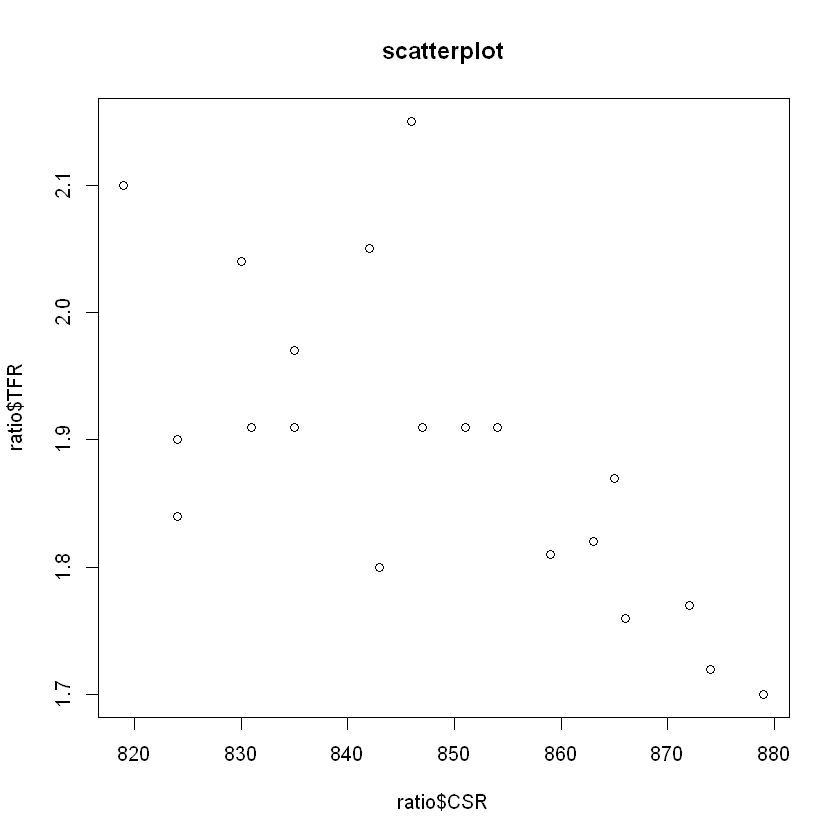

In [30]:
## to draw scatterplot 
plot(ratio$CSR,ratio$TFR, main="scatterplot")

In [3]:
##linear regression one variable
smpl<-lm(ratio$CSR~ ratio$TFR) 
summary(smpl)


Call:
lm(formula = ratio$CSR ~ ratio$TFR)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.101  -9.251   3.861   9.220  23.315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1033.64      49.14  21.035 4.02e-14 ***
ratio$TFR     -98.12      25.91  -3.786  0.00135 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.88 on 18 degrees of freedom
Multiple R-squared:  0.4434,	Adjusted R-squared:  0.4124 
F-statistic: 14.34 on 1 and 18 DF,  p-value: 0.001352


In [32]:
## to look at the coefficients only
smpl$coef
## altenative for coeeficients
coef(smpl)

(Intercept)   ratio$TFR 
 1033.63640   -98.11699

(Intercept)   ratio$TFR 
 1033.63640   -98.11699

In [4]:
##linear regression with multiple variables
mult<-lm(ratio$CSR~ ratio$TFR+ratio$Fem_lit+ratio$SC_pop) 
summary(mult)
coef(mult)


Call:
lm(formula = ratio$CSR ~ ratio$TFR + ratio$Fem_lit + ratio$SC_pop)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.730  -6.791   1.776   8.564  16.972 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   886.4359    78.0168  11.362 4.52e-09 ***
ratio$TFR     -72.1413    26.5482  -2.717   0.0152 *  
ratio$Fem_lit   0.8165     0.4242   1.925   0.0722 .  
ratio$SC_pop    1.2464     0.5250   2.374   0.0304 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.43 on 16 degrees of freedom
Multiple R-squared:  0.6032,	Adjusted R-squared:  0.5288 
F-statistic: 8.107 on 3 and 16 DF,  p-value: 0.00165


(Intercept)     ratio$TFR ratio$Fem_lit  ratio$SC_pop 
  886.4359356   -72.1413179     0.8164636     1.2464419

## Logistic regression

In [6]:
#install.packages("ISLR")
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 4.1.3"


In [7]:
data <- ISLR::Default

In [36]:
summary(data)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

This dataset contains the following information about 10,000 individuals:

1. default: Indicates whether or not an individual defaulted.
2. student: Indicates whether or not an individual is a student.
3. bank balance: Average balance carried by an individual.
4. income: Income of the individual.

We will use student status, bank balance, and income to build a logistic regression model that predicts the probability that a given individual defaults:

In [8]:
#fit logistic regression model
model <- glm(default~balance+student+income, family="binomial", data=data)
summary(model)


Call:
glm(formula = default ~ balance + student + income, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


We can observe the following values in the output for the null and residual deviance.We can use these values to calculate the Chi-Square statistic of the model.
There are p = 3 predictor variables degrees of freedom.

Chi-Square ==  Null deviance - Residual deviance

We can use the Chi-Square to P-Value Calculator to find that a Chi-Square value of 1331.6 with 3 degrees of freedom has a p-value of 0.000000.
#https://www.statology.org/chi-square-p-value-calculator/

In [38]:
pchisq(1331.6, df=3, lower.tail=FALSE)

[1] 2.047324e-288

In [39]:
url <-"http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <-read.csv(url, header=FALSE)

In [40]:
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [41]:
colnames(data)<-c("age","sex","cp","trestbps","chol","fbs","restecg",
                  "thatach","exang","oldpeak","slope","ca","thal","hd")

In [42]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thatach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thal    : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


1. sex is a number, but it is supposed to be a factor, where 0 represents "female" and 1 represents "male"

2. cp (Chest pain) is also supposed to be a factor, where 1-3 represents different types of pain and 4 represents no chest pain

3. ca and thal are correctly called factors, but one of the levels is "?" when we need it to be NA... So some cleaning is required

In [43]:
#First change "?" to NA
data[data=="?"]<-NA

In [44]:
##Just to make data easier on the eyes, we convert the 0's in sex to F
data[data$sex==0,]$sex<-"F"
data[data$sex==1,]$sex<-"M"

In [45]:
##Lastly, we convert the column into a factor.
data$sex<-as.factor(data$sex)

In [46]:
##then we convert a bunch of other columns into factors since that's what they are supposed to be
data$cp<-as.factor(data$cp)
data$fbs<-as.factor(data$fbs)
data$restecg<-as.factor(data$restecg)
data$exang<-as.factor(data$exang)
data$slope<-as.factor(data$slope)

In [47]:
##since the ca column originally had a ? in it, rather than NA, R thinks 
#it's a column of strings. corrected by telling R its a column of integers..
data$ca<-as.integer(data$ca)

In [48]:
##and we convered it to a factor
data$ca<-as.factor(data$ca)

In [49]:
##did same for thal
data$thal<-as.integer(data$thal)
data$thal<-as.factor(data$thal)

last thing need to do to the data is make hd,(aka heart disease), a factor that is easy on the eyes. Here I'm using a another trick

with ifelse() to convert the 0s to "Healthy" and the 1's to "unhealthy"

In [50]:
data$hd <-ifelse(test=data$hd==0, yes="Healthy", no="Unhealthy")
data$hd <-as.factor(data$hd)

In [51]:
##once we've done fixing up data, check that made appropriate changes with str()
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thatach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


In [52]:
##Now see how man y samples (row of data) have NA values.
##Later we will decide if we can just toss these samples out, or if we 
##should impute values for the NA's

nrow(data[is.na(data$ca)| is.na(data$thal),])

[1] 6

In [53]:
##we can view the samples with NA's by selecting those row's from the data.frame
data[is.na(data$ca)| is.na(data$thal),]

,age,sex,cp,trestbps,chol,fbs,restecg,thatach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
88,53,F,3,128,216,0,2,115,0,0.0,1,0,NA,Healthy
167,52,M,3,138,223,0,0,169,0,0.0,1,NA,3,Healthy
193,43,M,4,132,247,1,2,143,1,0.1,2,NA,7,Unhealthy
267,52,M,4,128,204,1,0,156,1,1.0,2,0,NA,Unhealthy
288,58,M,2,125,220,0,0,144,0,0.4,2,NA,7,Healthy
303,38,M,3,138,175,0,0,173,0,0.0,1,NA,3,Healthy


In [54]:
##We will remove these samples
nrow(data)

[1] 303

In [55]:
data <-data[!(is.na(data$ca)| is.na(data$thal)),]

In [56]:
nrow(data)

[1] 297

## Now we need to make sure that Healthy and diseased samples come from each gender(M&F) 

In [57]:
xtabs(~hd+sex, data=data)

           sex
hd            F   M
  Healthy    71  89
  Unhealthy  25 112

In [58]:
xtabs(~hd+cp, data=data)

           cp
hd            1   2   3   4
  Healthy    16  40  65  39
  Unhealthy   7   9  18 103

In [59]:
xtabs(~hd+fbs, data=data)

           fbs
hd            0   1
  Healthy   137  23
  Unhealthy 117  20

In [60]:
xtabs(~hd+restecg, data=data)

           restecg
hd           0  1  2
  Healthy   92  1 67
  Unhealthy 55  3 79

## Logit

Here's our call to glm() the function that performs Generalised linear models

In [61]:
logistic <-glm(hd~sex, data=data, family = "binomial")
summary(logistic)


Call:
glm(formula = hd ~ sex, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2765  -1.2765  -0.7768   1.0815   1.6404  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0438     0.2326  -4.488 7.18e-06 ***
sexM          1.2737     0.2725   4.674 2.95e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 409.95  on 296  degrees of freedom
Residual deviance: 386.12  on 295  degrees of freedom
AIC: 390.12

Number of Fisher Scoring iterations: 4


In [62]:
logistic <- glm(hd ~ ., data=data, family = "binomial")
summary(logistic)


Call:
glm(formula = hd ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0490  -0.4847  -0.1213   0.3039   2.9086  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.253978   2.960399  -2.113 0.034640 *  
age         -0.023508   0.025122  -0.936 0.349402    
sexM         1.670152   0.552486   3.023 0.002503 ** 
cp2          1.448396   0.809136   1.790 0.073446 .  
cp3          0.393353   0.700338   0.562 0.574347    
cp4          2.373287   0.709094   3.347 0.000817 ***
trestbps     0.027720   0.011748   2.359 0.018300 *  
chol         0.004445   0.004091   1.087 0.277253    
fbs1        -0.574079   0.592539  -0.969 0.332622    
restecg1     1.000887   2.638393   0.379 0.704424    
restecg2     0.486408   0.396327   1.227 0.219713    
thatach     -0.019695   0.011717  -1.681 0.092781 .  
exang1       0.653306   0.447445   1.460 0.144267    
oldpeak      0.390679   0.239173   1.633 0.102373   

In [63]:




#install.packages("haven")
library(haven)
getwd()

Warning message:
"package 'haven' was built under R version 4.1.3"


[1] "C:/Users/sathi/Videos"

In [64]:
Badheri<-read_dta("C:\\Users\\sathi\\Downloads\\badheri_regnew.dta")

In [65]:
names(Badheri)

[1] "n_adlt_bov" "no_bovine"  "operated"   "cattleshed" "high_medu" 
[6] "high_fedu"  "no_child"   "no_adult"   "no_old"

1. Y=nbo (Number of bovine owned last year)  
2. Xs= land(land operated size),cattleshed (Area of Cattle shed),
3. high_medu & high_fedu (Highest male education and Highest female education in hh)
4. no_child(number of Children upto 14 years in hh), 
5. no_adult( number of adults (15-60years) in hh), no_old (numbers of old members in hh 60 and above) etc

In [66]:
attach(Badheri)

In [67]:
PoissonModel1 <-glm(no_bovine~operated+cattleshed+
                      high_medu+high_fedu+
                      no_child+no_adult+no_old
                    ,family="poisson")
summary(PoissonModel1)


Call:
glm(formula = no_bovine ~ operated + cattleshed + high_medu + 
    high_fedu + no_child + no_adult + no_old, family = "poisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5928  -1.6903  -0.1086   0.8449   3.4125  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.348e-01  1.996e-01  -0.675  0.49955   
operated     2.915e-02  9.866e-03   2.955  0.00313 **
cattleshed   5.457e-05  4.238e-05   1.288  0.19787   
high_medu    6.051e-02  2.951e-02   2.051  0.04029 * 
high_fedu   -2.490e-02  2.743e-02  -0.908  0.36404   
no_child     4.611e-02  4.061e-02   1.135  0.25621   
no_adult     8.756e-02  3.640e-02   2.406  0.01615 * 
no_old       2.066e-01  8.557e-02   2.414  0.01577 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 336.84  on 131  degrees of freedom
Residual deviance: 248.22  on 124  degrees of freedom
  (1 observation

In [68]:
#lets quickly interp some of that output

with(PoissonModel1, pchisq(null.deviance - deviance,df.null - 
                             df.residual,lower.tail = FALSE)) 
confint(PoissonModel1)

[1] 2.374054e-16

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-5.322708e-01,0.2504922444
operated,9.182249e-03,0.0479526738
cattleshed,-2.986484e-05,0.0001371359
high_medu,2.268127e-03,0.1179864763
high_fedu,-7.834980e-02,0.0291770732
no_child,-3.468408e-02,0.1246577224
no_adult,1.631988e-02,0.1590502826
no_old,3.728876e-02,0.3729345631


In [69]:
PoissonModel2 <-glm(n_adlt_bov~operated+cattleshed+
                      high_medu+high_fedu+
                      no_child+no_adult+no_old
                    ,family="poisson")
summary(PoissonModel2)


Call:
glm(formula = n_adlt_bov ~ operated + cattleshed + high_medu + 
    high_fedu + no_child + no_adult + no_old, family = "poisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1629  -1.2766  -0.1370   0.6626   2.8582  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -6.502e-01  2.567e-01  -2.533  0.01131 * 
operated     2.734e-02  1.327e-02   2.061  0.03933 * 
cattleshed   4.680e-05  5.711e-05   0.820  0.41249   
high_medu    1.842e-02  3.948e-02   0.466  0.64088   
high_fedu   -1.277e-02  3.677e-02  -0.347  0.72831   
no_child     5.695e-02  5.229e-02   1.089  0.27615   
no_adult     1.307e-01  4.769e-02   2.741  0.00612 **
no_old       2.013e-01  1.118e-01   1.801  0.07172 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 208.28  on 131  degrees of freedom
Residual deviance: 152.49  on 124  degrees of freedom
  (1 observatio

In [70]:
with(PoissonModel2, pchisq(null.deviance - deviance,df.null - 
                             df.residual,lower.tail = FALSE)) 
confint(PoissonModel2)

[1] 1.041244e-09

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-1.163518e+00,-0.1569622274
operated,1.314932e-04,0.0523692062
cattleshed,-6.803876e-05,0.0001579937
high_medu,-5.984143e-02,0.0950545258
high_fedu,-8.432562e-02,0.0598260880
no_child,-4.753085e-02,0.1577798536
no_adult,3.752623e-02,0.2245934404
no_old,-2.052291e-02,0.4180304866
